In [34]:
import cv2
from matplotlib import pyplot as plt

In [35]:
img = cv2.imread("data/solidWhiteCurve.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

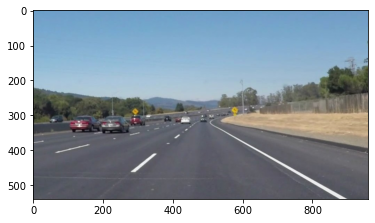

In [36]:
plt.imshow(img)

In [37]:
import numpy as np
def focus(img , vec):
    mask = np.zeros_like(img)
    if len(img.shape) == 3:
        mc = (255,) * img.shape[2]
    else:
        mc = 255
    cv2.fillPoly(mask, vec, mc)
    masked = cv2.bitwise_and(img, mask)
    return masked

In [38]:
height, width = img.shape[0:2]
cc = focus(img , np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))

In [39]:
cc.shape

(540, 960, 3)

Text(0.5, 1.0, 'cc')

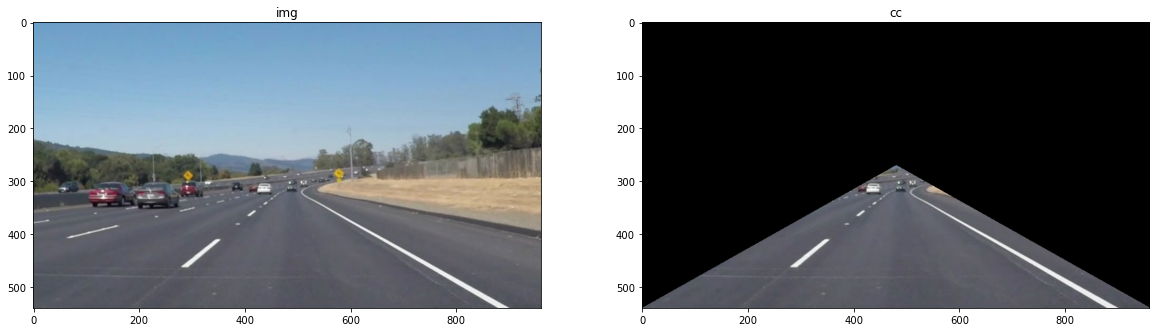

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("img")

plt.subplot(1,2,2)
plt.imshow(cc, cmap="gray")
plt.title("cc")

In [41]:
gray = cv2.cvtColor(cc , cv2.COLOR_RGB2GRAY)

Text(0.5, 1.0, 'cc')

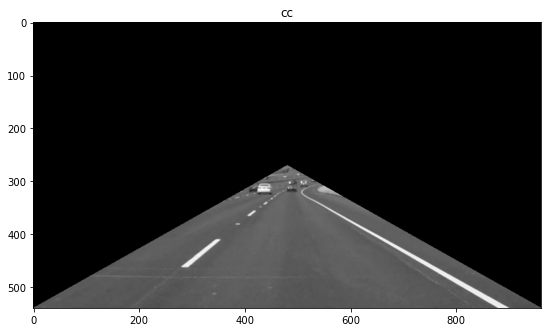

In [42]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.title("cc")

In [43]:
ci = cv2.Canny(gray, 200, 300)

Text(0.5, 1.0, 'cc')

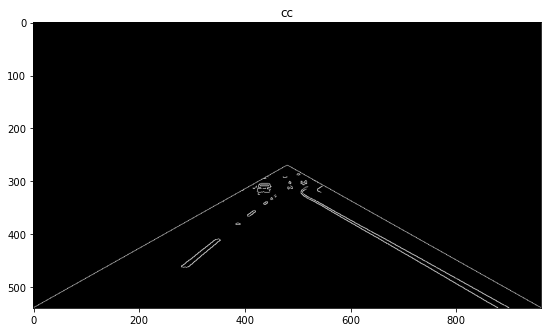

In [44]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(ci, cmap="gray")
plt.title("cc")

In [45]:
cic = focus(ci, np.array([[(0 , height), (width/2, height/2), (width, height)]], np.int32))

Text(0.5, 1.0, 'cic')

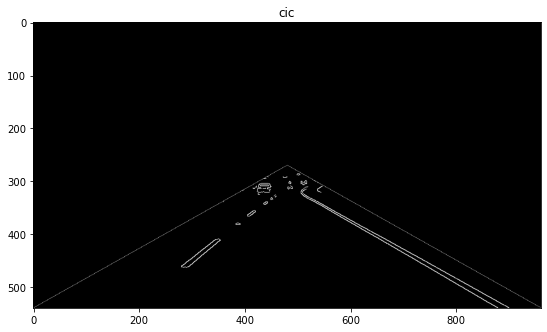

In [46]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cic, cmap="gray")
plt.title("cic")

In [47]:
Lines = cv2.HoughLinesP(cic, rho=6, theta=np.pi/60,threshold=160, 
                        lines=np.array([]), minLineLength=40, maxLineGap=25)

In [48]:
print(Lines)

[[[486 312 877 538]]

 [[787 476 896 538]]

 [[483 311 555 348]]

 [[290 463 353 412]]

 [[385 382 482 311]]

 [[484 314 607 377]]

 [[307 439 347 410]]

 [[839 505 899 539]]

 [[685 421 726 442]]

 [[543 342 619 385]]

 [[383 381 458 326]]

 [[ 10 534  91 488]]

 [[796 447 886 498]]]


In [49]:
LineImg= np.zeros((cic.shape[0] , cic.shape[1], 3), dtype=np.uint8)

In [50]:
cic.shape

(540, 960)

In [51]:
LineImg.shape

(540, 960, 3)

In [52]:
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        cv2.line(LineImg, (x1, y1), (x2, y2), [255,255,0],2)

In [53]:
merged = np.copy(img)

In [54]:
merged = cv2.addWeighted(merged, 0.8, LineImg, 1.0, 0.0)

Text(0.5, 1.0, 'merged')

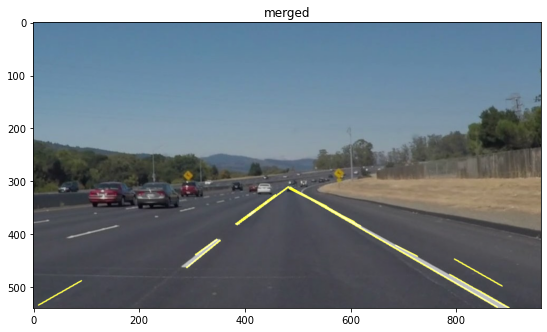

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(merged, cmap="gray")
plt.title("merged")

In [94]:
xleft=[]
yleft=[]
xright=[]
yright=[]
import math
for cod in Lines:
    for x1, y1, x2, y2 in cod:
        slope =(y2 - y1)/(x2 - x1)
    if math.fabs(slope) < 0.5:
        continue
    if slope <= 0:
        xleft.extend([x1, x2])
        yleft.extend([y1, y2])
    else:
        xright.extend([x1, x2])
        yright.extend([y1, y2])

In [95]:
xleft

[290, 353, 385, 482, 307, 347, 383, 458, 10, 91]

In [96]:
m = np.copy(img)

In [97]:
min_y = int(m.shape[0] * (3 / 5))
max_y = int(m.shape[0])
poly_left = np.poly1d(np.polyfit(yleft,xleft,deg=1))

left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

poly_right = np.poly1d(np.polyfit(yright,xright,deg=1))

right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))

In [130]:
z = [[[left_x_start, max_y, left_x_end, min_y],[right_x_start, max_y, right_x_end, min_y]]]

In [131]:
z

[[[53, 540, 496, 324], [912, 540, 511, 324]]]

In [132]:
Li = np.zeros((cic.shape[0] , cic.shape[1], 3), dtype=np.uint8)

In [133]:
for cod in z:
    for x1, y1, x2, y2 in cod:
        cv2.line(Li, (x1, y1), (x2, y2), [255,255,0],2)

Text(0.5, 1.0, 'img')

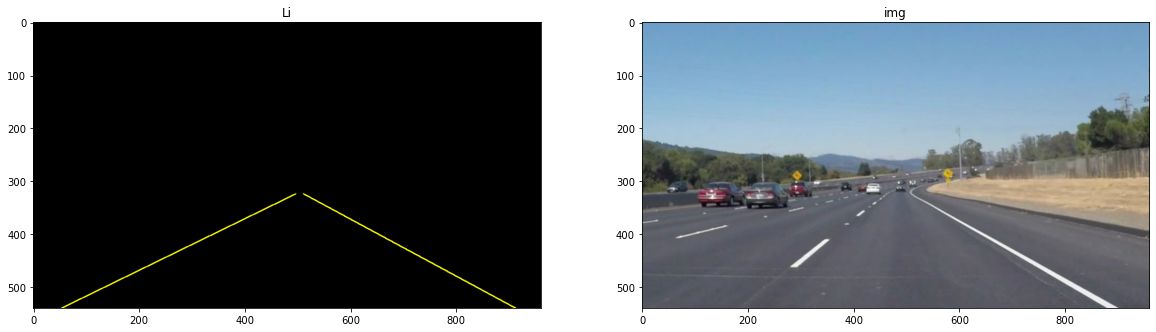

In [134]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.title("img")



In [135]:
m = np.copy(img)

In [136]:
m = cv2.addWeighted(m, 0.8, Li, 1.0, 0.0)

Text(0.5, 1.0, 'm')

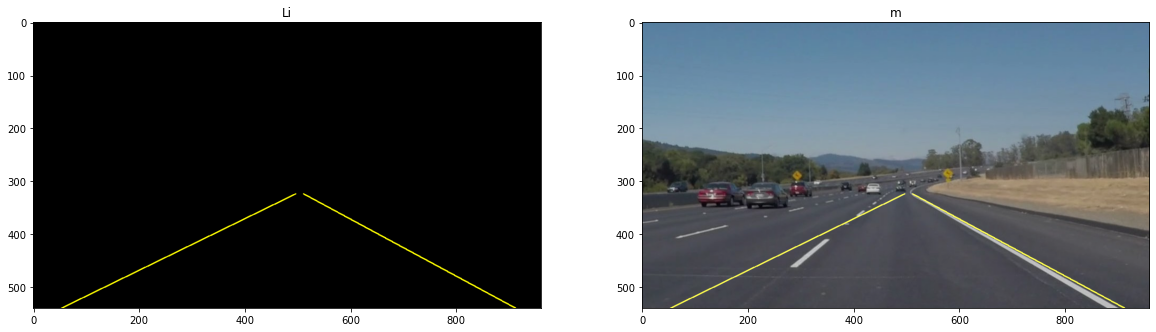

In [137]:
plt.figure(figsize=(20,20))


plt.subplot(1,2,1)
plt.imshow(Li, cmap="gray")
plt.title("Li")

plt.subplot(1,2,2)
plt.imshow(m, cmap="gray")
plt.title("m")